# CS 445 Course Project

Final Project: https://docs.google.com/document/d/11s9vB9TJSIP3EbcTtzcrFQ2U8Fh18c8LzvDqWWyYFV8/edit#

Polish Tasks
* Reset resized image so it doesn't clip

## Setup

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial import Delaunay
from scipy.linalg import solve

In [3]:
# #Brayden
# datadir = "/Users/braydenturner/projects/MCS/cs445/course_project/" 

In [4]:
# #Caleb
datadir = "./CS445_CourseProject"

In [5]:
# %matplotlib notebook
%matplotlib widget

# Load Images

In [6]:
class Image:
    def __init__(self, path):
        self.image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB).astype('double') / 255.0

In [7]:
img1 = Image('images/male.jpg') 
img2 = Image('images/female.jpg')
print(np.amax(img1.image))

1.0


In [8]:
# Set images to same width and height

print(img1.image.shape)
print(img2.image.shape)

if (img1.image.shape[0] < img2.image.shape[0]):
    dim = (img1.image.shape[1], img1.image.shape[0])

    img2.image = cv2.resize(img2.image, dim, interpolation = cv2.INTER_AREA)
    
else:
    dim = (img2.image.shape[1], img2.image.shape[0])
    img1.image = cv2.resize(img1.image, dim, interpolation = cv2.INTER_AREA)
    
print(img1.image.shape)
print(img2.image.shape)
print(np.amax(img1.image))

(950, 800, 3)
(408, 381, 3)
(408, 381, 3)
(408, 381, 3)
1.0000000372529032


## Point Correspondence

In [9]:
def specify_corresponding_points(img, clicked = None):
    '''
    img: input image
    clicked: ??
    return: clicked: Array of shape 2xP (number of points clicked)
            clicked[0]: array of length P containing the x coordinates
            clicked[1]: array of length P contraining y coordinates
    '''
    fig = plt.figure()
    if clicked:
        num = len(clicked[0])
        fig.set_label(f'Choose {num} corresponding points on image. Press q to quit')
    else:
        fig.set_label('Choose points on image. Press q to quit')
    plt.axis('off')
    plt.imshow(img)
    xs = []
    ys = []
    clicked = [] #CONCERN: Do we want this to be nested in the if clicked statement? 
#                          #or is the goal to reset the clicked array?

    def on_mouse_pressed(event):
        x = event.xdata
        y = event.ydata
        xs.append(x)
        ys.append(y)
        
        counter = len(xs)
        
        plt.plot(x, y, "r+")
        plt.text(x + 5, y + 5, counter, color="red")

    def onclose(event):
        clicked.append(xs)
        clicked.append(ys)
        
    def key_press(event):
        if event.key == 'q':
            print("Quitting")
            clicked.append(xs)
            clicked.append(ys)
            plt.close(fig)
            
        
        
    # Create an hard reference to the callback not to be cleared by the garbage
    # collector
    fig.canvas.mpl_connect('button_press_event', on_mouse_pressed)
    fig.canvas.mpl_connect('close_event', onclose)
    fig.canvas.mpl_connect('key_press_event', key_press)
    return clicked

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


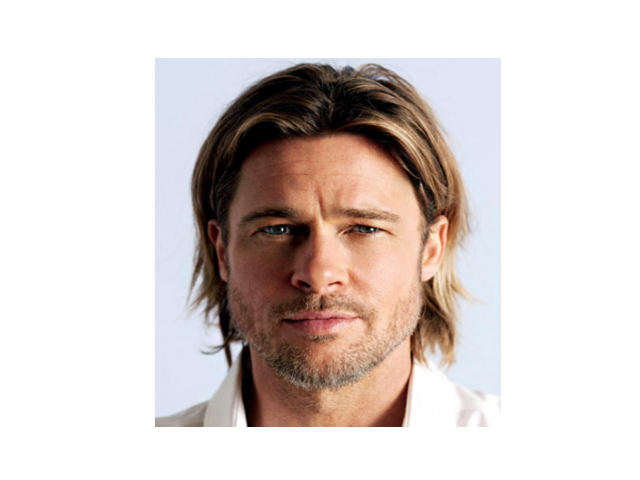

In [144]:
img1.pts = specify_corresponding_points(img1.image)

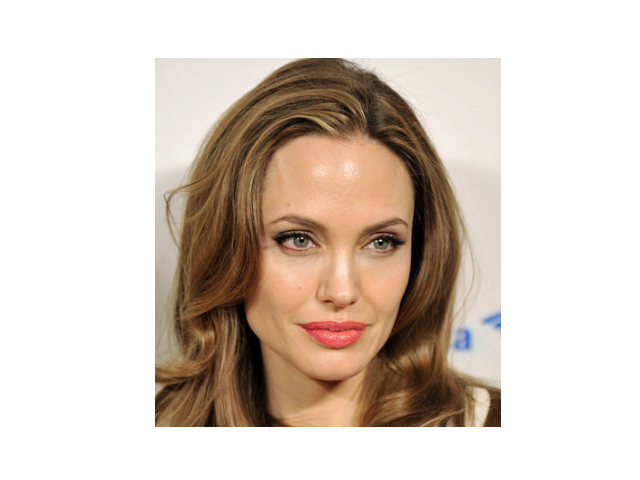

In [145]:
img2.pts = specify_corresponding_points(img2.image, img1.pts)

In [146]:
# Assert we have equal number of points
assert len(img1.pts) == len(img2.pts) and len(img1.pts[0]) == len(img2.pts[0])  and len(img1.pts[1]) == len(img2.pts[1])

## Triangulation Mesh

In [147]:
# convert to list of (x,y) touples for each point for use in scipy.spatial.Delaunay()
def toPtArray(pts, h, w):
    numPts = len(pts[0])
    points = np.zeros((numPts + 4, 2)) # add 4 points for 4 corners
#     print(numPts)
    for i in range(len(pts[1])):
        points[i][0] = pts[0][i]
        points[i][1] = pts[1][i]

    #Add the 4 corners
    points[numPts][0] = 0
    points[numPts][1] = 0
    points[numPts+1][0] = 0
    points[numPts+1][1] = h
    points[numPts+2][0] = w
    points[numPts+2][1] = 0
    points[numPts+3][0] = w
    points[numPts+3][1] = h
    return points

In [148]:
# print(img1.pts)

In [149]:
pts1 = toPtArray(img1.pts, img1.image.shape[0], img1.image.shape[1])
pts2 = toPtArray(img2.pts, img2.image.shape[0], img2.image.shape[1])

In [150]:
tri1 = Delaunay(pts1)

# tri2 = Delaunay(pts2)

In [151]:
print(tri1.simplices)
print(pts1)

[[ 0 21 20]
 [22  2 20]
 [ 7 23 21]
 [23  4 22]
 [ 1  0 20]
 [ 2  1 20]
 [ 3  2 22]
 [ 4  3 22]
 [18 19  7]
 [ 9  1  2]
 [ 5  7 21]
 [ 5 18  7]
 [ 0  5 21]
 [18  5  0]
 [ 3 10  2]
 [10  9  2]
 [10 15 14]
 [ 6  4 23]
 [ 6 19  4]
 [ 7  6 23]
 [19  6  7]
 [ 1  8  0]
 [ 9  8  1]
 [13 10 14]
 [10 13  9]
 [11  3  4]
 [15 11  4]
 [11 10  3]
 [11 15 10]
 [19 17  4]
 [17 15  4]
 [15 17 14]
 [17 13 14]
 [16 18  0]
 [17 16 13]
 [16 19 18]
 [16 17 19]
 [12  8  9]
 [13 12  9]
 [16 12 13]
 [ 8 12  0]
 [12 16  0]]
[[ 52.45453872 210.78571429]
 [102.12986339 105.91558442]
 [184.92207118  86.04545455]
 [285.37661664 137.92857143]
 [325.11687638 215.2012987 ]
 [113.16882443 316.75974026]
 [261.09090235 320.07142857]
 [183.81817508 363.12337662]
 [ 93.29869456 180.98051948]
 [161.740253   169.94155844]
 [203.68830495 169.94155844]
 [269.92207118 175.46103896]
 [114.27272054 194.22727273]
 [159.53246079 190.91558442]
 [212.51947378 193.12337662]
 [255.57142183 190.91558442]
 [147.38960365 242.7987013 ]
 [

In [152]:
def display_triangulation(tri, pts, img):
    fig1 = plt.figure()
    plt.imshow(img.image)
    plt.triplot(pts[:,0], pts[:,1], tri.simplices)
    plt.plot(pts[:,0], pts[:,1], 'o')
    plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


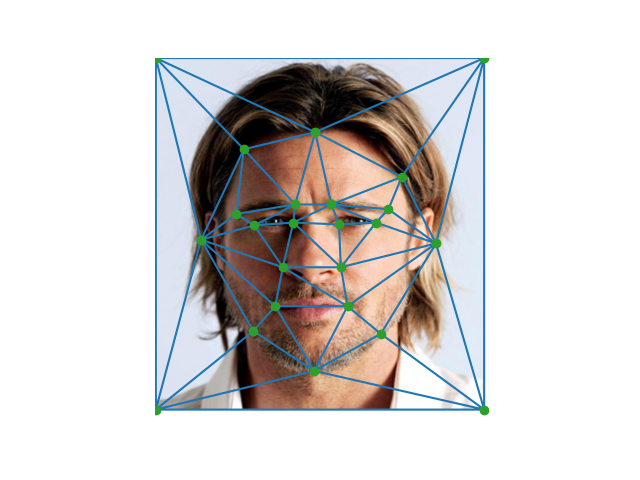

In [153]:
display_triangulation(tri1, pts1, img1)

The pts in pts1 and pts2 will be matched up so long as when clicking the points they are tagged in corresponding order. By simply taking the Delaunay of the first image and using those same simplices with the points for imag 2 we have a matching triangle mesh for both images. 

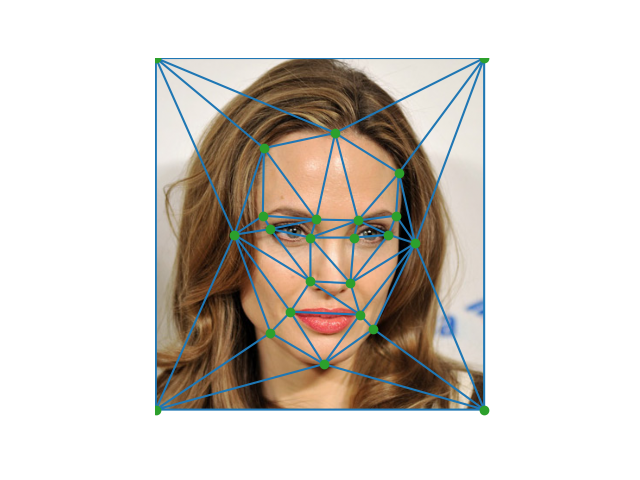

In [154]:
display_triangulation(tri1, pts2, img2)

In [155]:
pts1.shape

(24, 2)

The different attributes of the Delaunay can be found here: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html
What we still need to do is create some sort of correlation between the triangles of one and the triangles of the other according to Lect. 6.1.3 time: 4:39
That is probably easiest if we choose images with high correspondance to start 

Lecture notes (Apparently everyone is stealing the same stuff from Efros): 
https://www.seas.upenn.edu/~cse399b/Lectures/CSE399b-07-triangle.pdf

## Linear Interpolation

Equation for linear interpolation: P + t * (Q-P) : 0 < t < 1

In [156]:
def lin_intepolate(pts1, pts2, n_steps):
    '''
    Takes pt locations for image1 and image2, and number of steps desired and 
    returns an array containing each point at each step in the linear interpolation
    
inputs:
    pts1:     array- size: num_points x 2 - array containing 2D locs. starting point of each linear interpolation
    pts2:     array- size: num_points x 2 - array containing 2D locs. end point of each linear interpolation
    n_steps:  int: indicating number of steps along linear path for each point
return: 
    l_interp: array- size: n_steps x num_points x 2 
    [step_number, pt_number, x or y]
    '''
    assert n_steps > 1
    num_pts, _ = pts1.shape
    l_interp = np.zeros((n_steps, num_pts,2))
    for j in range(num_pts):
        for xy in range(2):
            p1 = pts1[j,xy]
            p2 = pts2[j,xy]
            for i in range(n_steps):
                l_interp[i,j,xy] = p1 + (p2 - p1) * (i / (n_steps-1))
    return l_interp

In [157]:
l = lin_intepolate(pts1, pts2, 3)

In [158]:
# print(pts1)
print(l.shape)

(3, 24, 2)


In [159]:
# test1 = np.arange(0,20).reshape(10,2)
# print(test1)
# test2 = np.arange(2,22).reshape(10,2)
# print(test2)


In [160]:
# # Just returns the original 2 
# lin_intepolate(test1,test2, 2)

In [161]:
# # Returns an extra step in the middle
# lin_intepolate(test1,test2, 3)

In [162]:
# Simple Morph
avg_pts = lin_intepolate(pts1,pts2, 3)[1]

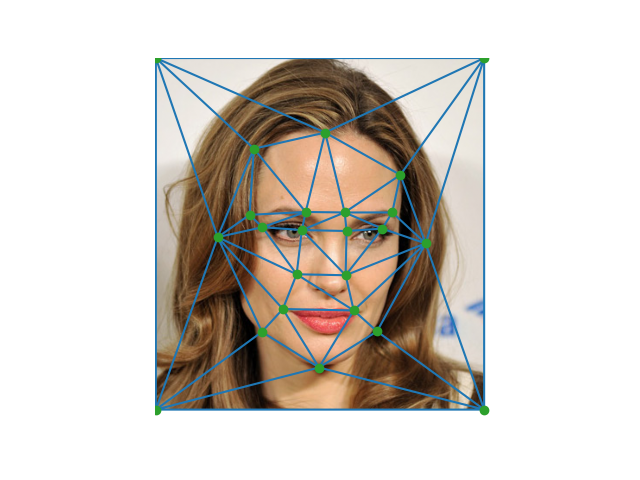

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


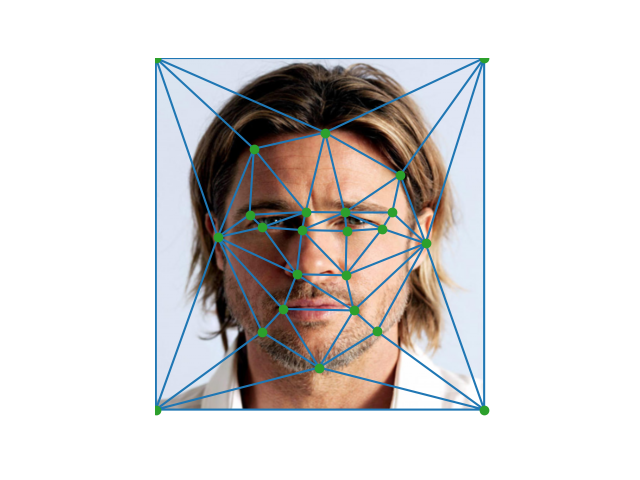

In [164]:
# Average points between the two
display_triangulation(tri1, avg_pts, img2)
display_triangulation(tri1, avg_pts, img1)

## Affine Transformation

Lesson 6.1.1 (2:45)
https://www.coursera.org/learn/cs-445/lecture/hdRaZ/lesson-6-1-1-image-morphing
![Lecture](images/notes.jpeg)

$ \begin{bmatrix}
x' \\
y' 
\end{bmatrix} =  
\begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}  
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}$

$
T = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}  
$

For the new triangles, we want to do an affine projection back to the two images (with interpolation) to grab the nearest pixel to the one we are filling and weighted average the two colors. To get the transformation matrix between the two triangles, we need to set up a system of linear equations and solve.

Once we have T above, we can map any point x, y in to x', y'. And to get the reverse projection, we can append a [0,0,1] row to T and take the inverse.


In [165]:
def solve_transformation(tri_from, tri_to):
#     print(tri_from.shape)
#     print(tri_from)
    x_a, y_a = tri_from[0]
    x_b, y_b = tri_from[1]    
    x_c, y_c = tri_from[2]    
    x_prime_a, y_prime_a = tri_to[0]
    x_prime_b, y_prime_b = tri_to[1]
    x_prime_c, y_prime_c = tri_to[2]
    
    
    # x and y below come from the old triangle we are morphing from
    A = np.array(
        [
            [x_a, y_a, 1, 0, 0, 0],
            [0, 0, 0, x_a, y_a, 1],
            [x_b, y_b, 1, 0, 0, 0],
            [0, 0, 0, x_b, y_b, 1],
            [x_c, y_c, 1, 0, 0, 0],
            [0, 0, 0, x_c, y_c, 1],
        ]
    )  
    # x' and y' below come from the triangle we are morphing to
    b = np.array(
        [
            x_prime_a,
            y_prime_a,
            x_prime_b,
            y_prime_b,
            x_prime_c,
            y_prime_c,
        ]
    )
    # Solve
    x = solve(A, b)
    
    # rehape in to 
    # [[a, b, c]
    #  [d, e, f]]
    x = x.reshape((2, 3))
    
    return x



In [166]:
class Transformations:
    
    def __init__(self, n_steps, tri_simplices, pts):
        self.tri_simplices = tri_simplices
        n_tri, _ = tri_simplices.shape
        
        # Triangles from-to
        self.tri_from = np.zeros((n_steps, n_tri, 3, 2))
        self.tri_to = np.zeros((n_steps, n_tri, 3, 2))
        
        self.n_tri = n_tri
        
        # Lst of transformations
        self.T = np.zeros((n_steps, n_tri, 2, 3))
        
        self.shape =  self.T.shape
        
        self.pts = pts
        
    def __getitem__(self, step):
        return self.T[step]

        
    def set_tris(self, step, tri_n, tri_from, tri_to):
        self.tri_from[step, tri_n] = tri_from
        self.tri_to[step, tri_n] = tri_to
        
    def set_T(self, step, tri, t):
        self.T[step, tri] = t
        

In [167]:
# Returns transformation from new image back to the original images with their triangles
def getAllTransformations(pts1, pts2, n_steps, tri_simplices):
    
    l_interp = lin_intepolate(pts1, pts2, n_steps)
    
    #transformation 1/2 (array of n_steps length)
    n_tri, _ = tri_simplices.shape
    
    T1 = Transformations(n_steps, tri_simplices, pts1)
    T2 = Transformations(n_steps, tri_simplices, pts2)
    
    for triangle in range(n_tri):
        
        t = tri_simplices[triangle]
        
        tri_to1 = pts1[t]
        tri_to2 = pts2[t]
        
        for n in range(n_steps):  
            tri_from = l_interp[n, t]
#             t1 = solve_transformation(tri_from1, tri_to)
#             t2 = solve_transformation(tri_from2, tri_to)
#             t1 = t1.tolist()
#             t1.append([0,0,1])
#             t1 = np.array(t1)
            
#             t1_inv = np.linalg.inv(t1)
                              
            t1 = solve_transformation(tri_from, tri_to1)
            t2 = solve_transformation(tri_from, tri_to2)
            
            T1.set_T(n, triangle, t1)
            T1.set_tris(n, triangle, tri_from, tri_to1)
            T2.set_T(n, triangle, t2)
            T2.set_tris(n, triangle, tri_from, tri_to2)
            
            
    return T1,T2


In [168]:
num_steps = 10
T1, T2 = getAllTransformations(pts1, pts2, num_steps, tri1.simplices)

Method to get points in a triangle given three vertices
https://stackoverflow.com/questions/21339448/how-to-get-list-of-points-inside-a-polygon-in-python

In [169]:
from matplotlib.path import Path

def points_from_triangle(tri, img):
    
    r, c = img.shape[0], img.shape[1]
    
    y, x = np.meshgrid(np.arange(r), np.arange(c)) # make a canvas with coordinates
    y, x = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T 

    p = Path(tri) # make a polygon
    grid = p.contains_points(points)
    mask = grid.reshape(c,r)
    
    return mask

In [170]:
from math import floor, ceil

def get_pixel_value(im, x, y):
    hw = im.shape
    h = hw[0]
    w = hw[1]
    x_low = floor(x)
    x_high = ceil(x)
    y_low = floor(y)
    y_high = ceil(y)
    #check bounds, if below zero or past width/height, set value to edge pixel inside of image
    if x > w - 1:
        x_low = w-1
        x_high = w-1
    elif x <= 0:
        x_low = 0
        x_high = 0
    if y > h - 1:
        y_low = h-1
        y_high = h-1
    elif y <= 0:
        y_low = 0
        y_high = 0
    
    x_dec = x % 1
    y_dec = y % 1
    
    high = (im[y_high,x_high] * x_dec) + (im[y_high, x_low] * (1-x_dec))
    low = (im[y_low, x_high] * x_dec) + (im[y_low,  x_low] * (1-x_dec))
    ret = (high * y_dec) + (low * (1 - y_dec))
    return ret

In [171]:
def transformedImage(T, im, step):
    #TODO
    '''
    inputs:
    #T             - 2x3 matrix for transformation for this step in the process for each triangle
    #im            - image that is being transformed
    #tri_simplices - (num_triangles x 3)array corresponding to the pts of each vertex of each triangle in 
                     original image
    #tri_pts.      - pts corresponding to each possible vertex such that tri_pts[tri_simplices] will produce 
                     3 xy-coordinate pairs that correspond to the location of the vertex 
    #
    '''
    
    rows, cols = im.shape[0:2]
    
    new_image = np.zeros(im.shape)
    num_triangles = T.tri_simplices.shape[0]
    
    for t in range(num_triangles):
        
        transformer = T[step][t]
        tri = T.tri_from[step][t]
        
        # print(tri)
        
        # Gets points from this triangle
        mask = points_from_triangle(tri, im)
#         m = mask.astype(float)
#         fig1 = plt.figure()
#         plt.imshow(m)
#         plt.show()
        
        for r in range(rows):
            for c in range(cols):
                if mask[c, r]:
                    x = c
                    y = r
                    x_prime, y_prime = transformer @ np.array([x,y,1])
                    new_image[r][c] = get_pixel_value(im, x_prime, y_prime)
    
    return new_image
        

## Tie It All Together

In [172]:
def getTransformedSequence(T1, T2, im1, im2, tri_simplices):
    assert T1.shape == T2.shape
    assert im1.shape == im2.shape
    
    n_steps,n_tri,_,_ = T1.shape
    
    im_h, im_w, c = im1.shape
    output_images = np.zeros((n_steps, im_h, im_w, c))
    im1_images = np.zeros((n_steps, im_h, im_w, c))
    im2_images = np.zeros((n_steps, im_h, im_w, c))
    
    for step in range(n_steps):
        #calculate image1
        im1_int = transformedImage(T1, im1, step)
        
        #calculate image2
        im2_int = transformedImage(T2, im2, step)
        
        #crossdisolve images
        output_images[step] = im1_int + (im2_int - im1_int) * (step / (n_steps-1))
        im1_images[step] = im1_int
        im2_images[step] = im2_int
        
    return output_images, im1_images, im2_images

In [173]:
o, im1_images, im2_images = getTransformedSequence(T1, T2, img1.image, img2.image, tri1.simplices)

(10, 408, 381, 3)


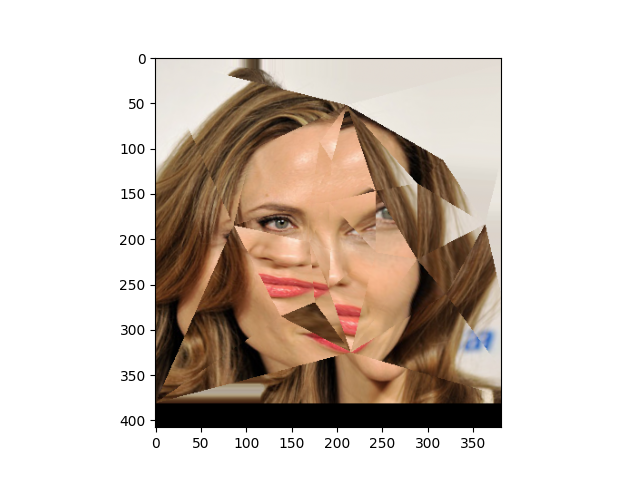

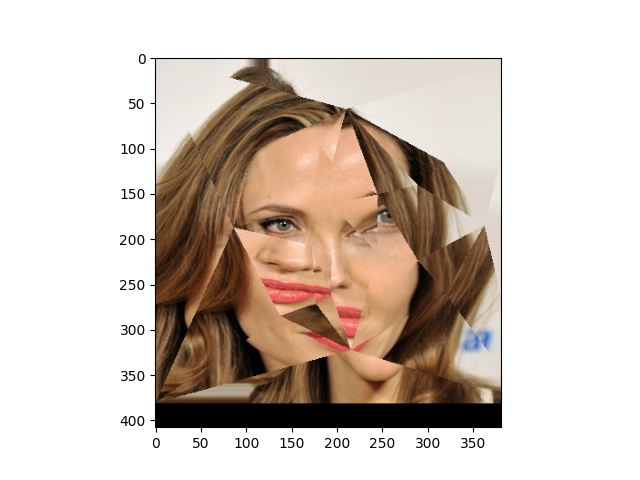

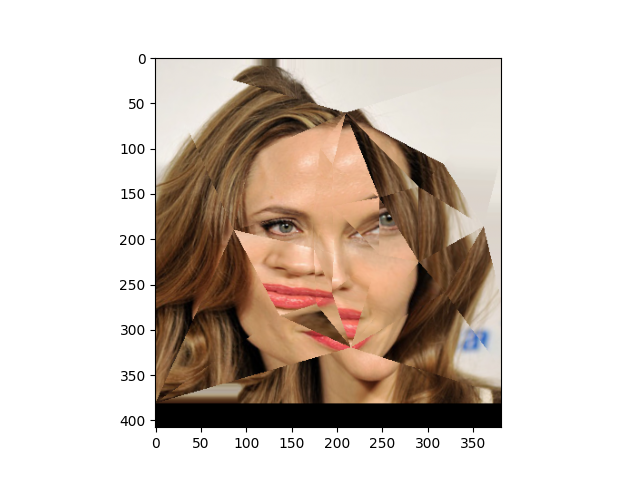

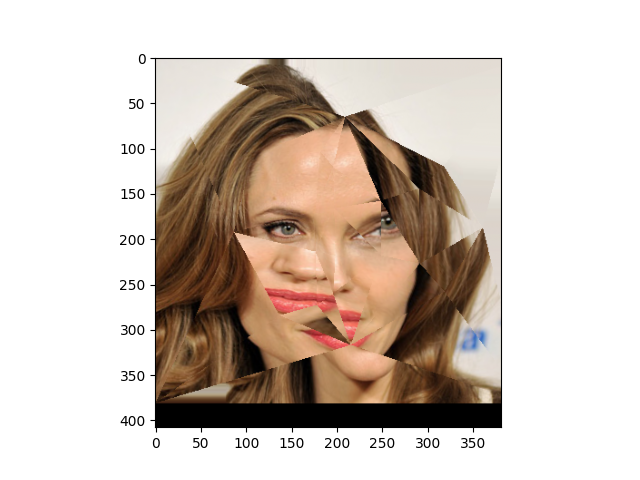

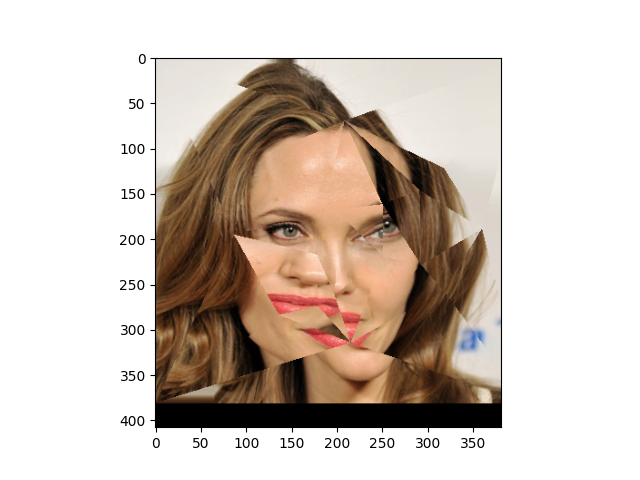

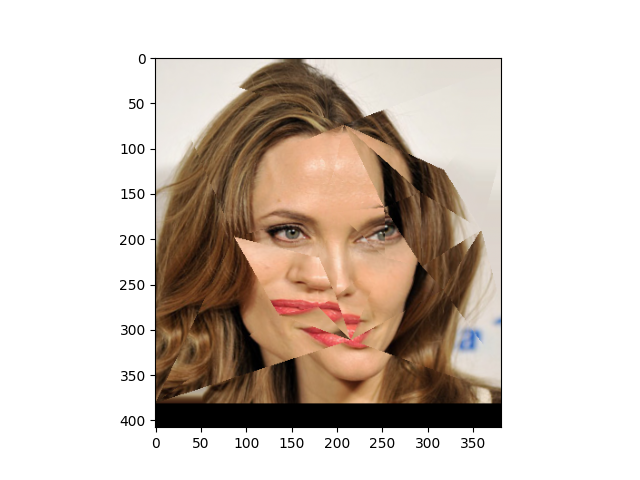

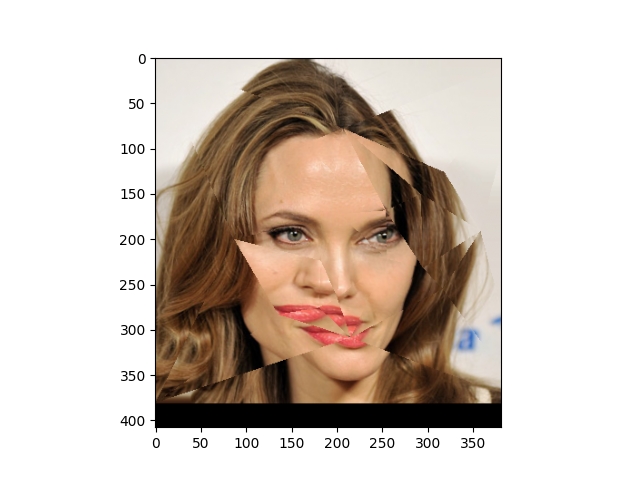

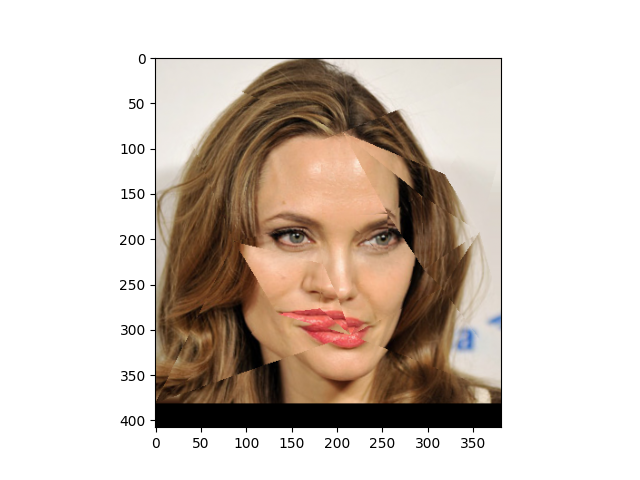

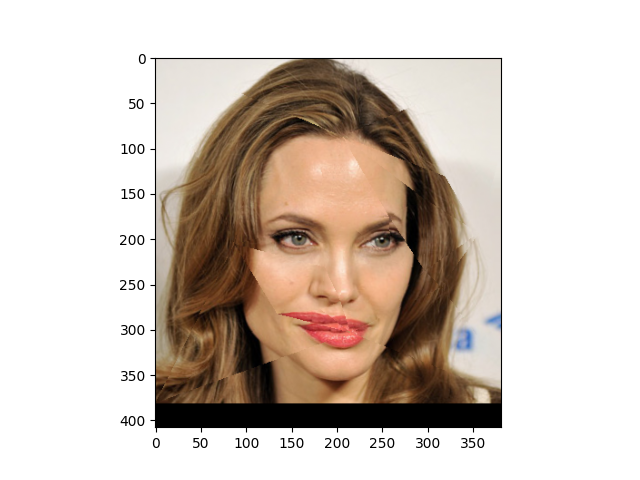

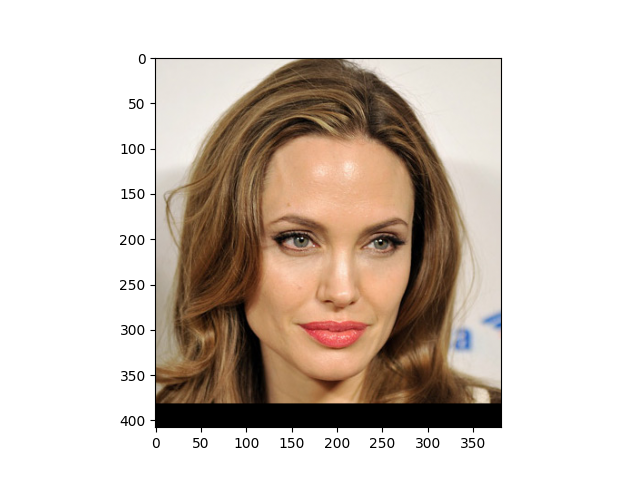

In [175]:
print(o.shape)
n_steps, h, w, c = o.shape
for i in range(n_steps):
    fig1 = plt.figure()
    plt.imshow(im2_images[i])
    plt.show()